<a href="https://colab.research.google.com/github/dakim01/My-Data-projects/blob/master/California_House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as pyplot
import numpy as np

In [ ]:
data = '/content/drive/MyDrive/California House Prices/housing.csv'
df = pd.read_csv(data)
df_houses = pd.DataFrame(df)
df_houses.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df_houses['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df_houses_shuffled = df_houses.sample(n=len(df_houses), random_state=1)
df_houses_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [ ]:
pd.get_dummies(df_houses_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [ ]:
df_houses_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [ ]:
df_houses_final = pd.concat([df_houses_shuffled.drop('ocean_proximity', axis=1),
                            pd.get_dummies(df_houses_shuffled['ocean_proximity'])], axis=1)
df_houses_final.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
6636,-118.16,34.15,17.0,821.0,163.0,229.0,164.0,7.3715,263000.0,1,0,0,0,0
17333,-120.44,34.91,12.0,3189.0,463.0,1200.0,442.0,5.2990,226800.0,1,0,0,0,0
19081,-122.48,38.31,29.0,2375.0,560.0,1124.0,502.0,2.3276,166200.0,1,0,0,0,0
13298,-117.64,34.08,35.0,1254.0,241.0,729.0,253.0,3.4950,118000.0,0,1,0,0,0
7157,-118.16,34.04,45.0,332.0,70.0,302.0,60.0,3.1895,156300.0,1,0,0,0,0


In [ ]:
houseing_pd_final = df_houses_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_bedrooms',
                                     'population',	'households',
                                     'median_income',
                                     '<1H OCEAN',	'INLAND',
                                     'ISLAND',	'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
houseing_pd_final

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [ ]:
houseing_pd_final = houseing_pd_final.dropna()
len(houseing_pd_final)

20433

In [ ]:
train_pd, test_pd, val_pd = houseing_pd_final[: 18000], houseing_pd_final[18000 : 19217], houseing_pd_final[19215:]


(18000, 1217, 1218)

In [ ]:
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((18000, 12), (18000,), (1218, 12), (1218,), (1217, 12), (1217,))

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scalar = StandardScaler().fit(x_train[:, :8])
def preprocessor(x):
  A = np.copy(x)
  A[:, :8] = scalar.transform(A[:, :8])
  return A

x_train_preprocessed = preprocessor(x_train)
x_train_preprocessed

array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
pd.DataFrame(x_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.603443,-0.736073,0.820845,0.315396,-0.276840,0.328234,-0.326667,1.127262,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.196843,-0.246809,-0.160526,-0.995001,-0.887105,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.301674,0.098553,-0.244613,0.074459,-0.887105,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.049782,-1.079740,-1.082862,-1.235508,-0.887105,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.589957,-0.628385,-0.567825,0.687448,1.127262,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,0.134325,0.111802,0.120643,-0.349320,1.127262,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.277849,-0.015390,-0.241986,-0.956265,-0.887105,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.996794,0.077354,1.027213,-0.165155,1.127262,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.463112,0.531359,0.464877,-0.923784,-0.887105,1.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(x_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.603443,-0.736073,0.820845,0.315396,-0.276840,0.328234,-0.326667,1.127262,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.196843,-0.246809,-0.160526,-0.995001,-0.887105,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.301674,0.098553,-0.244613,0.074459,-0.887105,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.049782,-1.079740,-1.082862,-1.235508,-0.887105,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.589957,-0.628385,-0.567825,0.687448,1.127262,0.0,0.0,0.0,0.0


<Axes: >

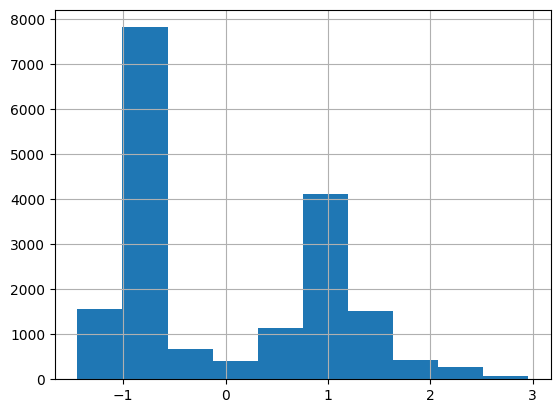

In [ ]:
pd.DataFrame(x_train_preprocessed)[1].hist()

In [ ]:
x_train, x_val, x_test = preprocessor(x_train), preprocessor(x_val), preprocessor(x_test)
